# ***Problem Statement*** 
## **Predicting the energy output of wind turbine based on weather condition**

Develop a time series model to Predict the power output of wind farm based on the weather condition in the site (1Hr prediction to 72Hrs. prediction) Build an application to recommend the Power Grid to suggest the best time to utilize the energy from wind farm

# **Importing Libraries and Loading Data**

In [73]:
from google.colab import drive 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import math
 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

from fbprophet import Prophet
from statsmodels.tsa.arima_model import ARIMA

In [75]:
data=pd.read_csv('/content/drive/My Drive/Datasets /Wind Turbine Dataset.csv')
df = data.rename(columns={"LV ActivePower (kW)":"Active Power", "Wind Speed (m/s)":"Wind Speed", "Theoretical_Power_Curve (KWh)":"Theoritical Power", "Wind Direction (°)":"Direction"})
df

,Date/Time,Active Power,Wind Speed,Theoritical Power,Direction
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286
...,...,...,...,...,...
50525,31 12 2018 23:10,2963.980957,11.404030,3397.190793,80.502724
50526,31 12 2018 23:20,1684.353027,7.332648,1173.055771,84.062599
50527,31 12 2018 23:30,2201.106934,8.435358,1788.284755,84.742500
50528,31 12 2018 23:40,2515.694092,9.421366,2418.382503,84.297913


# **Data Pre-Processing and Plotting**

In [87]:
df['Loss']= df['Theoritical Power']-df['Active Power']
df['Loss Percent']= (df['Loss']/df['Theoritical Power']) * 100
df['Date/Time'] = pd.to_datetime(df['Date/Time'],format='%d %m %Y %H:%M')
df['Date'] = df['Date/Time'].dt.date
df['Time'] = df['Date/Time'].dt.time

df['Sin Component'] = df['Wind Speed']*np.sin(math.pi*df['Direction']/180)
df['Cos Component'] = df['Wind Speed']*np.cos(math.pi*df['Direction']/180)
df

,Date/Time,Active Power,Wind Speed,Theoritical Power,Direction,Loss,Loss Percent,Date,Time,Sin Component,Cos Component
0,2018-01-01 00:00:00,380.047791,5.311336,416.328908,259.994904,36.281117,8.714532,2018-01-01,00:00:00,-5.230563,-0.922769
1,2018-01-01 00:10:00,453.769196,5.672167,519.917511,268.641113,66.148316,12.722848,2018-01-01,00:10:00,-5.670572,-0.134514
2,2018-01-01 00:20:00,306.376587,5.216037,390.900016,272.564789,84.523429,21.622774,2018-01-01,00:20:00,-5.210812,0.233413
3,2018-01-01 00:30:00,419.645905,5.659674,516.127569,271.258087,96.481664,18.693375,2018-01-01,00:30:00,-5.658310,0.124264
4,2018-01-01 00:40:00,380.650696,5.577941,491.702972,265.674286,111.052276,22.585236,2018-01-01,00:40:00,-5.562052,-0.420723
...,...,...,...,...,...,...,...,...,...,...,...
50525,2018-12-31 23:10:00,2963.980957,11.404030,3397.190793,80.502724,433.209835,12.752002,2018-12-31,23:10:00,11.247720,1.881673
50526,2018-12-31 23:20:00,1684.353027,7.332648,1173.055771,84.062599,-511.297256,-43.586782,2018-12-31,23:20:00,7.293312,0.758502
50527,2018-12-31 23:30:00,2201.106934,8.435358,1788.284755,84.742500,-412.822178,-23.084812,2018-12-31,23:30:00,8.399870,0.772948
50528,2018-12-31 23:40:00,2515.694092,9.421366,2418.382503,84.297913,-97.311588,-4.023829,2018-12-31,23:40:00,9.374748,0.936069


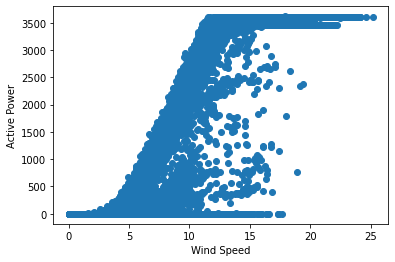

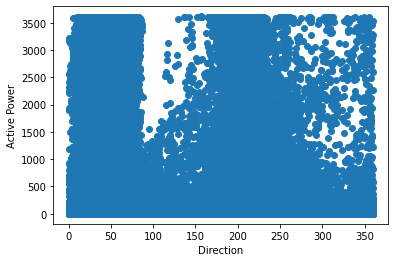

In [88]:
plt.scatter(df['Wind Speed'],df['Active Power'])
plt.xlabel('Wind Speed')
plt.ylabel('Active Power')
plt.show()

plt.scatter(df['Direction'],df['Active Power'])
plt.xlabel('Direction')
plt.ylabel('Active Power')
plt.show()

With the help of wind direction graph one can roughly conclude that the orientation of wind turbines is between 0-90 degrees and 180-270 degrees

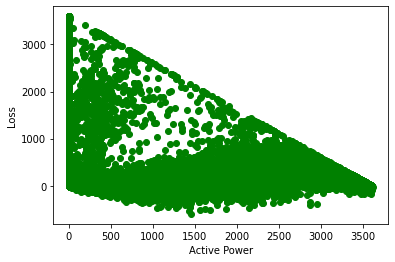

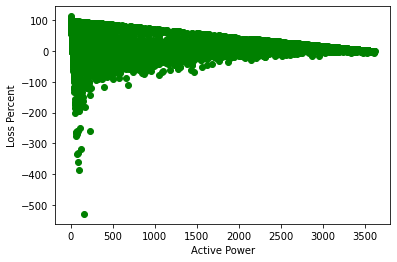

In [89]:
plt.scatter(df['Active Power'],df['Loss'],color='green')
plt.xlabel('Active Power')
plt.ylabel('Loss')
plt.show()

plt.scatter(df['Active Power'],df['Loss Percent'],color='green')
plt.xlabel('Active Power')
plt.ylabel('Loss Percent')
plt.show()

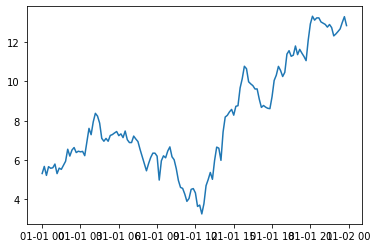

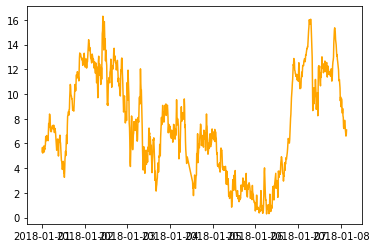

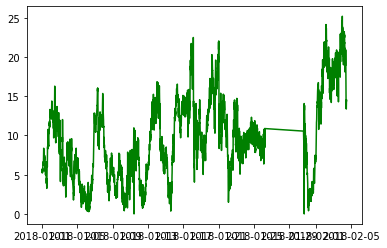

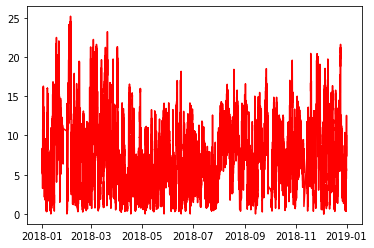

In [42]:
plt.plot(df['Date/Time'][:144],df['Wind Speed'][:144])
plt.show()
plt.plot(df['Date/Time'][:1008],df['Wind Speed'][:1008],color='orange')
plt.show()
plt.plot(df['Date/Time'][:4320],df['Wind Speed'][:4320],color='green')
plt.show()
plt.plot(df['Date/Time'],df['Wind Speed'],color='red')
plt.show()

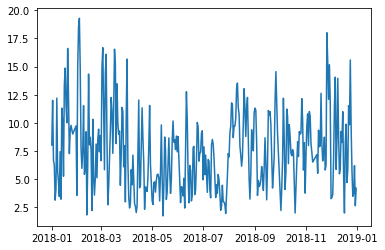

In [38]:
# plotting data for average wind speed and direction throughout the day
plot_data = df.groupby('Date')['Wind Speed'].mean()
plt.plot(plot_data.index,plot_data)
plt.show()

# **Predicting Power using Wind Speed and Direction (by MLP)**


In [31]:
X_train = df[['Wind Speed','Direction']][1000:]
Y_train = df['Active Power'][1000:]

mlp = MLPRegressor(hidden_layer_sizes=(8,8,8), activation='relu', solver='adam', max_iter=5000)
mlp.fit(X_train,Y_train)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(8, 8, 8), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=5000,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=None, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

In [32]:
x_test = [[5.3,259.99]]          # for the given values, Theoritical power = 416 and Active Power = 380 
print(mlp.predict(x_test))

[169.84804168]


In [0]:
X_test = df[['Wind Speed','Direction']][:1000]
Y_test = df['Active Power'][:1000]

Y_predict = mlp.predict(X_test)

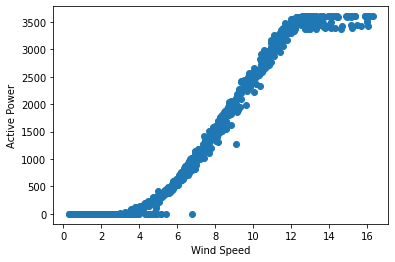

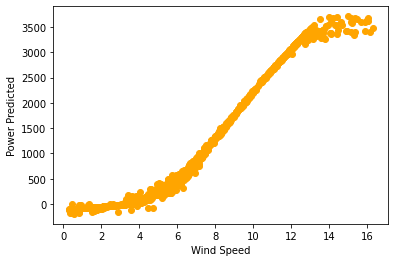

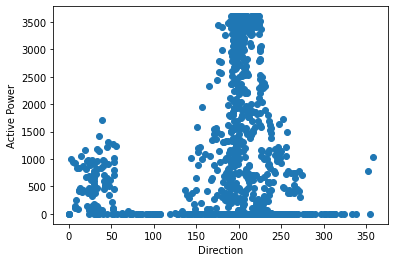

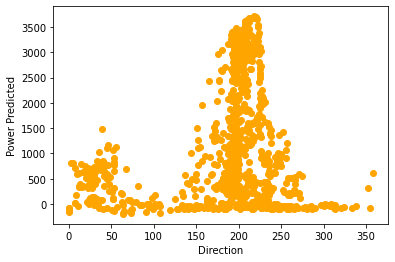

48374.391686992276

In [35]:
plt.scatter(df['Wind Speed'][:1000],df['Active Power'][:1000])
plt.xlabel('Wind Speed')  
plt.ylabel('Active Power') 
plt.show()

plt.scatter(df['Wind Speed'][:1000],Y_predict[:1000],color='orange')
plt.xlabel('Wind Speed') 
plt.ylabel('Power Predicted') 
plt.show()

plt.scatter(df['Direction'][:1000],df['Active Power'][:1000])
plt.xlabel('Direction')  
plt.ylabel('Active Power') 
plt.show()

plt.scatter(df['Direction'][:1000],Y_predict[:1000],color='orange')
plt.xlabel('Direction') 
plt.ylabel('Power Predicted') 
plt.show()

mean_squared_error(Y_test, Y_predict)

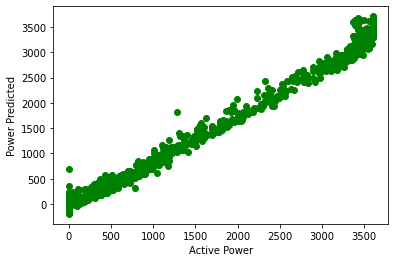

In [41]:
plt.scatter(df['Active Power'][:1000],Y_predict[:1000],color='green')
plt.xlabel('Active Power') 
plt.ylabel('Power Predicted') 
plt.show()

# **Predicting Power Using Sin and Cos Component (by MLP)**

In [90]:
X_train = df[['Sin Component','Cos Component']][1000:]
Y_train = df['Active Power'][1000:]

mlp = MLPRegressor(hidden_layer_sizes=(8,8,8), activation='relu', solver='adam', max_iter=500)
mlp.fit(X_train,Y_train)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(8, 8, 8), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=500,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=None, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

In [0]:
X_test = df[['Sin Component','Cos Component']][:1000]
Y_test = df['Active Power'][:1000]

Y_predict = mlp.predict(X_test)

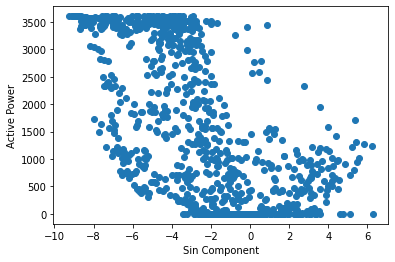

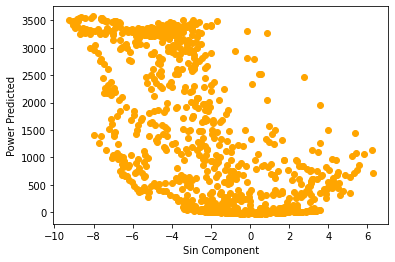

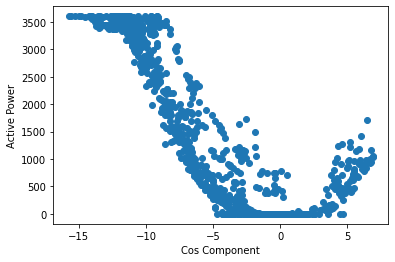

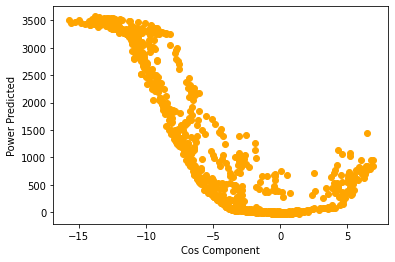

24624.707880652866

In [92]:
plt.scatter(df['Sin Component'][:1000],df['Active Power'][:1000])
plt.xlabel('Sin Component')  
plt.ylabel('Active Power') 
plt.show()

plt.scatter(df['Sin Component'][:1000],Y_predict[:1000],color='orange')
plt.xlabel('Sin Component') 
plt.ylabel('Power Predicted') 
plt.show()

plt.scatter(df['Cos Component'][:1000],df['Active Power'][:1000])
plt.xlabel('Cos Component')  
plt.ylabel('Active Power') 
plt.show()

plt.scatter(df['Cos Component'][:1000],Y_predict[:1000],color='orange')
plt.xlabel('Cos Component') 
plt.ylabel('Power Predicted') 
plt.show()

mean_squared_error(Y_test, Y_predict)

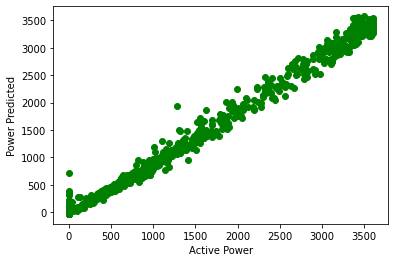

In [93]:
plt.scatter(df['Active Power'][:1000],Y_predict[:1000],color='green')
plt.xlabel('Active Power') 
plt.ylabel('Power Predicted') 
plt.show()

# **Time Series using Prophet for Wind Speed and Direction**

## Wind Speed

In [95]:
m = {'ds':df['Date/Time'][:40000],'y':df['Wind Speed'][:40000]}
data_prophet = pd.DataFrame(m)

model = Prophet(changepoint_prior_scale=0.01)
model.fit(data_prophet)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [98]:
future = model.make_future_dataframe(periods=10530, freq='10min')

forecast=model.predict(future)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
50525,2018-12-28 02:10:00,7.430154,1.277985,13.725121,3.980545,11.176238,0.048891,0.048891,0.048891,0.416538,0.416538,0.416538,-0.367647,-0.367647,-0.367647,0.0,0.0,0.0,7.479044
50526,2018-12-28 02:20:00,7.430108,0.860762,13.918101,3.979995,11.176785,0.060560,0.060560,0.060560,0.430316,0.430316,0.430316,-0.369757,-0.369757,-0.369757,0.0,0.0,0.0,7.490668
50527,2018-12-28 02:30:00,7.430062,0.911891,13.438102,3.979445,11.177332,0.070773,0.070773,0.070773,0.442580,0.442580,0.442580,-0.371807,-0.371807,-0.371807,0.0,0.0,0.0,7.500836
50528,2018-12-28 02:40:00,7.430016,1.889631,13.690670,3.978895,11.177878,0.078970,0.078970,0.078970,0.452766,0.452766,0.452766,-0.373796,-0.373796,-0.373796,0.0,0.0,0.0,7.508987
50529,2018-12-28 02:50:00,7.429971,1.278501,13.275657,3.978345,11.178425,0.084609,0.084609,0.084609,0.460332,0.460332,0.460332,-0.375723,-0.375723,-0.375723,0.0,0.0,0.0,7.514579


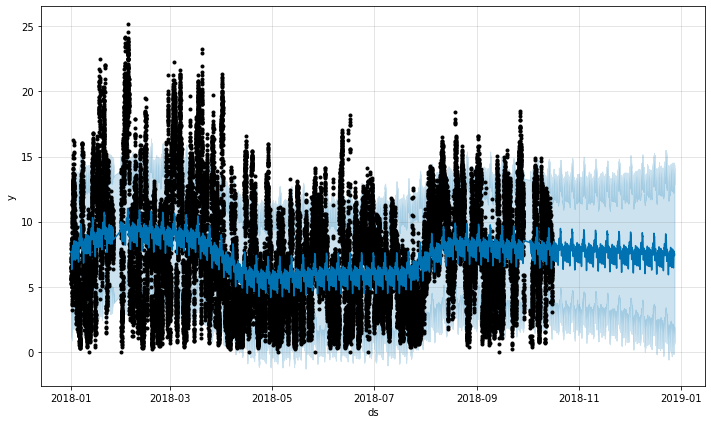

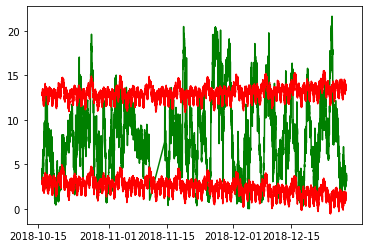

In [99]:
fig1=model.plot(forecast)
plt.show()

plt.plot(df['Date/Time'][40000:50000],df['Wind Speed'][40000:50000],color='green')
plt.plot(forecast['ds'][40000:],forecast['yhat_upper'][40000:],color='red')
plt.plot(forecast['ds'][40000:],forecast['yhat_lower'][40000:],color='red')
plt.show()

## Wind Direction 

In [106]:
m = {'ds':df['Date/Time'][:40000],'y':df['Direction'][:40000],'add1':df['Wind Speed'][:40000]}
data_prophet = pd.DataFrame(m)

model = Prophet(changepoint_prior_scale=0.01)
model.add_regressor('add1')
model.fit(data_prophet)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [107]:
future = model.make_future_dataframe(periods=10530, freq='10min')
future['add1']= df['Wind Speed']

forecast=model.predict(future)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,add1,add1_lower,add1_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,extra_regressors_additive,extra_regressors_additive_lower,extra_regressors_additive_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
50525,2018-12-28 02:10:00,50.443271,-57.625976,163.828230,30.347326,71.766356,-13.100246,-13.100246,-13.100246,5.252932,5.252932,5.252932,10.179053,10.179053,10.179053,-13.100246,-13.100246,-13.100246,8.174125,8.174125,8.174125,0.0,0.0,0.0,55.696203
50526,2018-12-28 02:20:00,50.441213,-46.298714,181.832720,30.340857,71.767909,0.320798,0.320798,0.320798,18.517893,18.517893,18.517893,10.040110,10.040110,10.040110,0.320798,0.320798,0.320798,8.156985,8.156985,8.156985,0.0,0.0,0.0,68.959107
50527,2018-12-28 02:30:00,50.439156,-51.958714,172.583069,30.334387,71.769462,-3.314214,-3.314214,-3.314214,14.710769,14.710769,14.710769,9.886236,9.886236,9.886236,-3.314214,-3.314214,-3.314214,8.138746,8.138746,8.138746,0.0,0.0,0.0,65.149924
50528,2018-12-28 02:40:00,50.437098,-51.549951,179.213338,30.327918,71.771015,-6.564523,-6.564523,-6.564523,11.273231,11.273231,11.273231,9.718349,9.718349,9.718349,-6.564523,-6.564523,-6.564523,8.119406,8.119406,8.119406,0.0,0.0,0.0,61.710329
50529,2018-12-28 02:50:00,50.435040,-63.754507,167.832286,30.321449,71.772569,-8.403822,-8.403822,-8.403822,9.232456,9.232456,9.232456,9.537320,9.537320,9.537320,-8.403822,-8.403822,-8.403822,8.098959,8.098959,8.098959,0.0,0.0,0.0,59.667496


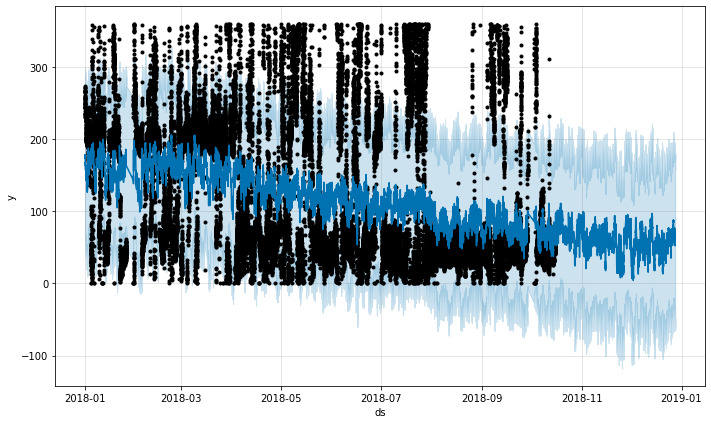

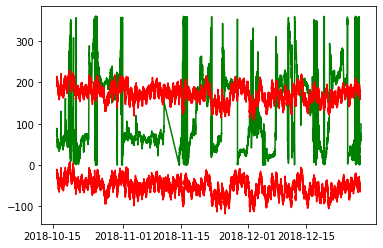

In [108]:
fig1=model.plot(forecast)
plt.show()

plt.plot(df['Date/Time'][40000:50000],df['Direction'][40000:50000],color='green')
plt.plot(forecast['ds'][40000:],forecast['yhat_upper'][40000:],color='red')
plt.plot(forecast['ds'][40000:],forecast['yhat_lower'][40000:],color='red')
plt.show()

# **Time Series Using Prophet for Sin and Cos Component**

## Sin Component 

In [127]:
m = {'ds':df['Date/Time'][:40000],'y':df['Sin Component'][:40000]}
data_prophet = pd.DataFrame(m)

model = Prophet(changepoint_prior_scale=0.01)
model.fit(data_prophet)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [128]:
future = model.make_future_dataframe(periods=10530, freq='10min')

forecast=model.predict(future)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
50525,2018-12-28 02:10:00,5.306582,-2.839954,12.033261,0.569063,9.439813,-0.423371,-0.423371,-0.423371,0.111428,0.111428,0.111428,-0.534799,-0.534799,-0.534799,0.0,0.0,0.0,4.883211
50526,2018-12-28 02:20:00,5.306570,-3.134944,12.328711,0.567561,9.440923,-0.417139,-0.417139,-0.417139,0.114131,0.114131,0.114131,-0.531271,-0.531271,-0.531271,0.0,0.0,0.0,4.889431
50527,2018-12-28 02:30:00,5.306558,-2.393422,11.564310,0.566058,9.442033,-0.410309,-0.410309,-0.410309,0.117320,0.117320,0.117320,-0.527628,-0.527628,-0.527628,0.0,0.0,0.0,4.896249
50528,2018-12-28 02:40:00,5.306546,-2.593858,12.224032,0.564555,9.443144,-0.402788,-0.402788,-0.402788,0.121085,0.121085,0.121085,-0.523872,-0.523872,-0.523872,0.0,0.0,0.0,4.903758
50529,2018-12-28 02:50:00,5.306534,-2.615973,12.230071,0.563052,9.444254,-0.394503,-0.394503,-0.394503,0.125500,0.125500,0.125500,-0.520003,-0.520003,-0.520003,0.0,0.0,0.0,4.912031


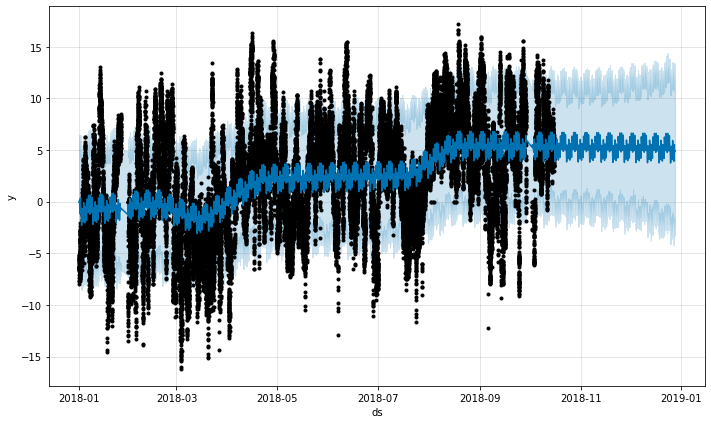

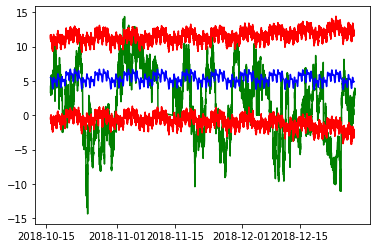

In [129]:
fig1=model.plot(forecast)
plt.show()

plt.plot(df['Date/Time'][40000:50000],df['Sin Component'][40000:50000],color='green')
plt.plot(forecast['ds'][40000:],forecast['yhat'][40000:],color='blue')
plt.plot(forecast['ds'][40000:],forecast['yhat_upper'][40000:],color='red')
plt.plot(forecast['ds'][40000:],forecast['yhat_lower'][40000:],color='red')
plt.show()

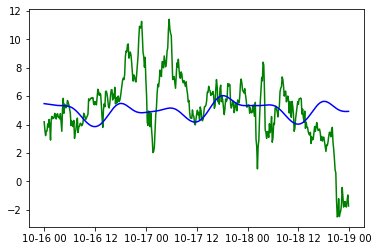

In [130]:
plt.plot(df['Date/Time'][40000:40432],df['Sin Component'][40000:40432],color='green')
plt.plot(forecast['ds'][40000:40432],forecast['yhat'][40000:40432],color='blue')
plt.show()

## Cos Component

In [123]:
m = {'ds':df['Date/Time'][:40000],'y':df['Cos Component'][:40000],'add1':df['Sin Component'][:40000]}
data_prophet = pd.DataFrame(m)

model = Prophet(changepoint_prior_scale=0.01)
model.add_regressor('add1')
model.fit(data_prophet)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [124]:
future = model.make_future_dataframe(periods=10530, freq='10min')
future['add1']= forecast['yhat']

forecast=model.predict(future)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,add1,add1_lower,add1_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,extra_regressors_additive,extra_regressors_additive_lower,extra_regressors_additive_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
50525,2018-12-28 02:10:00,2.045717,-1.849824,10.008618,0.057231,3.944682,1.828860,1.828860,1.828860,1.763951,1.763951,1.763951,-0.686664,-0.686664,-0.686664,1.828860,1.828860,1.828860,0.621755,0.621755,0.621755,0.0,0.0,0.0,3.809667
50526,2018-12-28 02:20:00,2.045710,-1.960572,9.277705,0.056927,3.945107,1.833070,1.833070,1.833070,1.751126,1.751126,1.751126,-0.699561,-0.699561,-0.699561,1.833070,1.833070,1.833070,0.617617,0.617617,0.617617,0.0,0.0,0.0,3.796836
50527,2018-12-28 02:30:00,2.045703,-2.012013,9.579806,0.056623,3.945531,1.837686,1.837686,1.837686,1.737467,1.737467,1.737467,-0.713632,-0.713632,-0.713632,1.837686,1.837686,1.837686,0.613414,0.613414,0.613414,0.0,0.0,0.0,3.783170
50528,2018-12-28 02:40:00,2.045696,-1.870795,9.153687,0.056319,3.945955,1.842769,1.842769,1.842769,1.723234,1.723234,1.723234,-0.728682,-0.728682,-0.728682,1.842769,1.842769,1.842769,0.609147,0.609147,0.609147,0.0,0.0,0.0,3.768930
50529,2018-12-28 02:50:00,2.045688,-1.815702,9.603333,0.056015,3.946379,1.848368,1.848368,1.848368,1.708678,1.708678,1.708678,-0.744507,-0.744507,-0.744507,1.848368,1.848368,1.848368,0.604817,0.604817,0.604817,0.0,0.0,0.0,3.754366


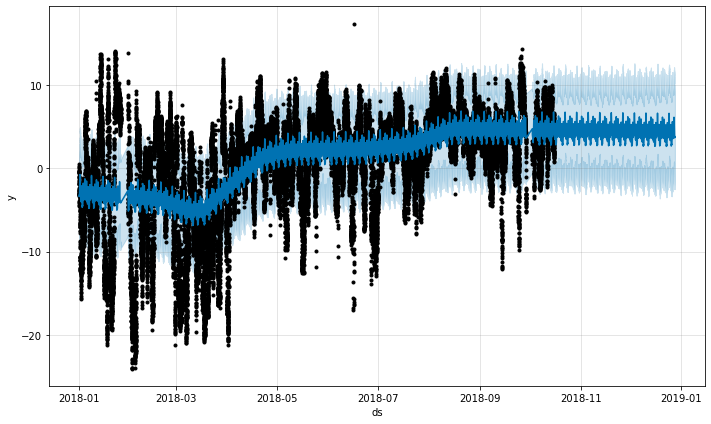

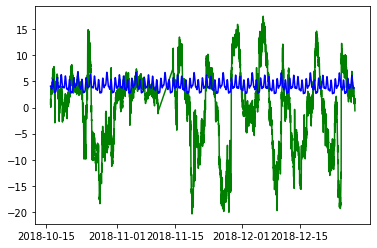

In [125]:
fig1=model.plot(forecast)
plt.show()

plt.plot(df['Date/Time'][40000:50000],df['Cos Component'][40000:50000],color='green')
plt.plot(forecast['ds'][40000:],forecast['yhat'][40000:],color='blue')
plt.show()

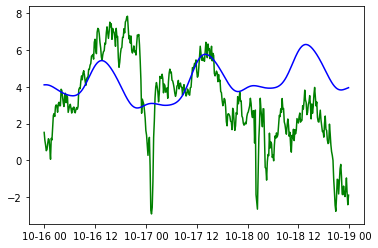

In [126]:
plt.plot(df['Date/Time'][40000:40432],df['Cos Component'][40000:40432],color='green')
plt.plot(forecast['ds'][40000:40432],forecast['yhat'][40000:40432],color='blue')
plt.show()

So for the Prophet model sort of correctly predicts the trend in the values. It is obvious that the values predicted are not accurate but it can be seen that the trend has been accurately predicted by prophet model for the sin and cos components for the next 72 hours given the time seires data for the last 365 days.

Also adding the regressor has proved very useful in the correct analysis of trend which is clearly shown in the last graph. 

# **Time Series Using ARIMA on sin and cos Components**

In [0]:
model = ARIMA(df['Sin Component'][:40000],order = (0,2,1))
result = model.fit()

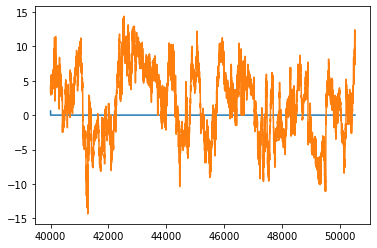

In [146]:
prediction = result.predict(40000,50529,df['Sin Component'])

prediction.plot()
df['Sin Component'][40000:].plot()